# Predicting heart disease using machine learning
we going to make the following approch:
1. Problem Statement
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

# 1.Problem Defination
In a statement
> Given clinical parameters about a patient,can we predict wheather or not they have heart disease?
# 2.Data
The original data came from cleaverland data from the UCI machine learning repository.

# 3.Evaluation

>If we can reach 95% accuracy at predicting wheather or not a patient has heart disease during the proff of concdpt , we'll presuethe project

# 4. Features
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

Create data dictionary

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
   *  Typical angina: chest pain related decrease blood supply to the heart
   *  Atypical angina: chest pain not related to heart
   *  Non-anginal pain: typically esophageal spasms (non heart related)
3.  Asymptomatic: chest pain not showing signs of disease
trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
chol - serum cholestoral in mg/dl
serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes
restecg - resting electrocardiographic results
0: Nothing to note
1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat
2: Possible or definite left ventricular hypertrophy.
thalach - maximum heart rate achieved
exang - exercise induced angina (1 = yes; 0 = no)
oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
slope - the slope of the peak exercise ST segment
0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslopins: signs of unhealthy heart
ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)
thal - thalium stress result
1,3: normal
6: fixed defect: used to be defect but ok now
7: reversable defect: no proper blood movement when excercising
target - have disease or not (1=yes, 0=no) (= the predicted attribute)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

   # we want plots to appear  in the notebook
%matplotlib inline
#  models from sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Models for evaluation

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [2]:
df = pd.read_csv('data/heart-disease.csv')
df.shape

(303, 14)

## Data Exploration (exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

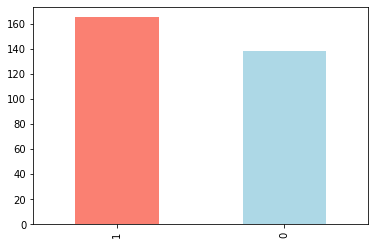

In [6]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease frequency according to sex

In [9]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
# compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


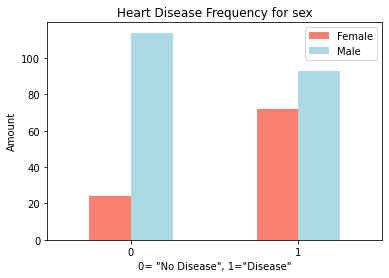

In [11]:
pd.crosstab(df.target,df.sex).plot(kind="bar",color=["salmon","lightblue"])

plt.title("Heart Disease Frequency for sex")
plt.xlabel('0= "No Disease", 1="Disease"')
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

## Age vs Max heart rate for heart disease

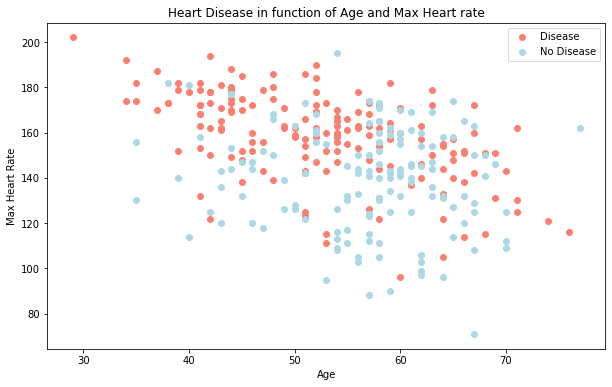

In [14]:
plt.figure(figsize=(10,6))

# scatter with plt live emple

plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon");

# scatte with nwegative eample
# scatter with plt live emple

plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue");
plt.title("Heart Disease in function of Age and Max Heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);

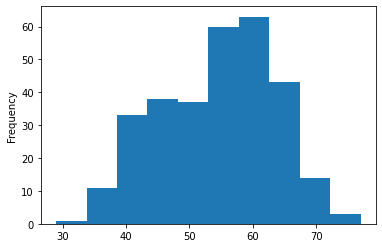

In [16]:
# distribution odf age column

df.age.plot.hist();

## Heart Disease Frequency per Chest Pain Type
cp - chest pain type
 * 0: Typical angina: chest pain related decrease blood supply to the heart
 * 1: Atypical angina: chest pain not related to heart
 * 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

In [17]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


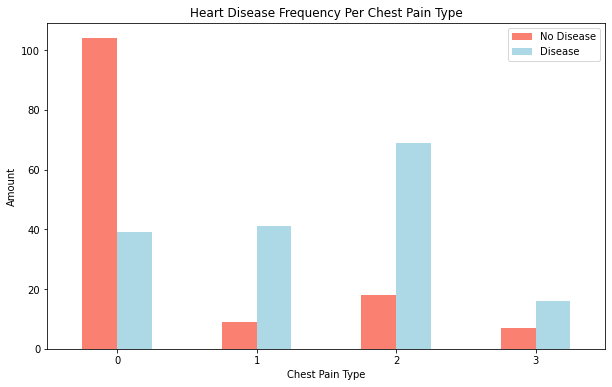

In [18]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [19]:
df.head()
# heading = independent variable
# target

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# corrolation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


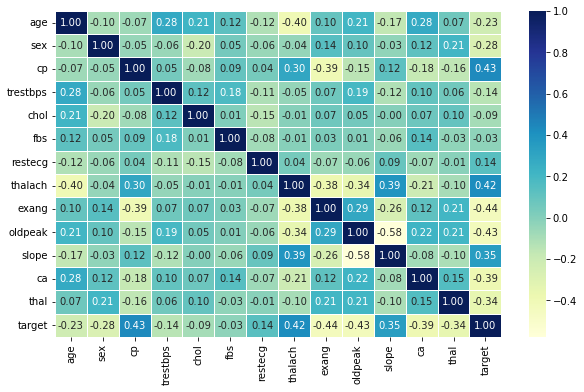

In [23]:
#  making our correlation matrix a little pretieer
corr_matrix = df.corr()

fig,ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap( corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

In [25]:
pd.crosstab(df.exang,df.target)

target,0,1
exang,,
0,62,142
1,76,23


# 5.Modelling

In [26]:
#  split the data
X = df.drop("target",axis=1)
y = df["target"]

np.random.seed(42)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [27]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [28]:
len(y_test)

61

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [32]:
models={"Logistic Regression":LogisticRegression(),
        "K-Neighbour":KNeighborsClassifier(),
        "Random Forest":RandomForestClassifier()
       }

#  create  function to fit and score model:
def fit_and_score(models,X_train,X_test,y_test,t_train):
    # Set random seed
    np.random.seed(42)
    model_scores={}
#     loop through model
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)
    return model_scores
    
    
    

In [35]:
model_scores = fit_and_score(models,X_train,X_test,y_test,y_train)
model_scores

F:\machine_learning\heart-disese-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'K-Neighbour': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## mdoel comparision

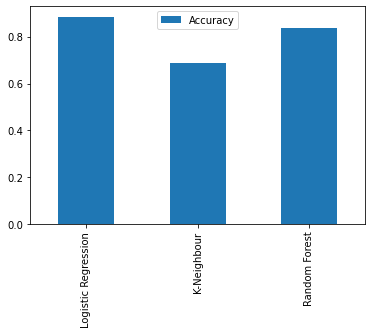

In [40]:
model_compare = pd.DataFrame(model_scores,index=['Accuracy'])
model_compare.T.plot.bar();

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:

1. Hypyterparameter tuning
2. Feature importance
3. Confusion matrix
4. Cross-validation
5. Precision
6. Recall
7. F1 score
8. Classification report
9. ROC curve
10. Area under the curve (AUC)

## Hyperparameter tuning(by hand)


In [42]:
# lets tune KNN

train_score=[]
test_score=[]

# create a  list of different n-neighbours
neighbours=range(1,21)

# setuo KNN
knn = KNeighborsClassifier()

# loop through different n_neighbour

for i in neighbours:
    knn.set_params(n_neighbors=i)
    # fit the algorithm
    knn.fit(X_train,y_train)
    
#     update the  train score list
    train_score.append(knn.score(X_train,y_train))
    
#     update the test score
    test_score.append(knn.score(X_test,y_test))



In [43]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

In [44]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

Themaximum Knn score on the test data:75.41%


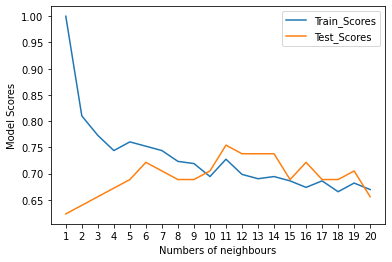

In [48]:
plt.plot(neighbours,train_score,label="Train_Scores")
plt.plot(neighbours,test_score,label="Test_Scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Numbers of neighbours")
plt.ylabel("Model Scores")
plt.legend()

print(f"Themaximum Knn score on the test data:{max(test_score)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV
We're going to tune:

* LogisticRegression()
* RandomForestClassifier()
... using RandomizedSearchCV

In [52]:
#  create a hyperparameter gris for logistic regression
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [54]:
np.random.seed(42)
# setup random hyperpameter search for logistic regression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=20
                               )
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START C=0.0001, solver=liblinear.................................
[CV 1/5; 1/20] END ..C=0.0001, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/5; 1/20] START C=0.0001, solver=liblinear.................................
[CV 2/5; 1/20] END ..C=0.0001, solver=liblinear;, score=0.633 total time=   0.0s
[CV 3/5; 1/20] START C=0.0001, solver=liblinear.................................
[CV 3/5; 1/20] END ..C=0.0001, solver=liblinear;, score=0.625 total time=   0.0s
[CV 4/5; 1/20] START C=0.0001, solver=liblinear.................................
[CV 4/5; 1/20] END ..C=0.0001, solver=liblinear;, score=0.604 total time=   0.0s
[CV 5/5; 1/20] START C=0.0001, solver=liblinear.................................
[CV 5/5; 1/20] END ..C=0.0001, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/5; 2/20] START C=0.00026366508987303583, solver=liblinear.................
[CV 1/5; 2/20] END C=0.00026366508987303583, so

[CV 5/5; 10/20] END C=0.615848211066026, solver=liblinear;, score=0.792 total time=   0.0s
[CV 1/5; 11/20] START C=1.623776739188721, solver=liblinear.....................
[CV 1/5; 11/20] END C=1.623776739188721, solver=liblinear;, score=0.776 total time=   0.0s
[CV 2/5; 11/20] START C=1.623776739188721, solver=liblinear.....................
[CV 2/5; 11/20] END C=1.623776739188721, solver=liblinear;, score=0.878 total time=   0.0s
[CV 3/5; 11/20] START C=1.623776739188721, solver=liblinear.....................
[CV 3/5; 11/20] END C=1.623776739188721, solver=liblinear;, score=0.792 total time=   0.0s
[CV 4/5; 11/20] START C=1.623776739188721, solver=liblinear.....................
[CV 4/5; 11/20] END C=1.623776739188721, solver=liblinear;, score=0.854 total time=   0.0s
[CV 5/5; 11/20] START C=1.623776739188721, solver=liblinear.....................
[CV 5/5; 11/20] END C=1.623776739188721, solver=liblinear;, score=0.792 total time=   0.0s
[CV 1/5; 12/20] START C=4.281332398719396, solver

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=20)

In [55]:

rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [61]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

Now lets use RandomizedSearchCV for random forest

In [58]:
np.random.seed(42)
# setup random hyperpameter search for random forest

rs = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=20,
                                verbose=20
                               )
rs.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10
[CV 1/5; 1/20] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10;, score=0.816 total time=   0.0s
[CV 2/5; 1/20] START max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10
[CV 2/5; 1/20] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10;, score=0.857 total time=   0.0s
[CV 3/5; 1/20] START max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10
[CV 3/5; 1/20] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10;, score=0.792 total time=   0.0s
[CV 4/5; 1/20] START max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10
[CV 4/5; 1/20] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10;, score=0.792 total time=   0.0s
[CV 5/5; 1/20] START max_depth=None, min_samples_leaf=

[CV 3/5; 8/20] END max_depth=10, min_samples_leaf=9, min_samples_split=16, n_estimators=260;, score=0.792 total time=   0.3s
[CV 4/5; 8/20] START max_depth=10, min_samples_leaf=9, min_samples_split=16, n_estimators=260
[CV 4/5; 8/20] END max_depth=10, min_samples_leaf=9, min_samples_split=16, n_estimators=260;, score=0.833 total time=   0.6s
[CV 5/5; 8/20] START max_depth=10, min_samples_leaf=9, min_samples_split=16, n_estimators=260
[CV 5/5; 8/20] END max_depth=10, min_samples_leaf=9, min_samples_split=16, n_estimators=260;, score=0.750 total time=   0.4s
[CV 1/5; 9/20] START max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=310
[CV 1/5; 9/20] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=310;, score=0.816 total time=   0.6s
[CV 2/5; 9/20] START max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=310
[CV 2/5; 9/20] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=310;, score=0.837 total time

[CV 1/5; 16/20] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=960;, score=0.816 total time=   1.8s
[CV 2/5; 16/20] START max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=960
[CV 2/5; 16/20] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=960;, score=0.837 total time=   2.0s
[CV 3/5; 16/20] START max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=960
[CV 3/5; 16/20] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=960;, score=0.812 total time=   1.9s
[CV 4/5; 16/20] START max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=960
[CV 4/5; 16/20] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=960;, score=0.854 total time=   2.1s
[CV 5/5; 16/20] START max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=960
[CV 5/5; 16/20] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=960;, score=0.792 total time=   2.2s

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=20)

In [59]:
rs.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [60]:
rs.score(X_test,y_test)

0.8688524590163934

## Hyperparamter Tuning with GridSearchCV
Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [63]:
# set up for hyperparameter tuning with logistic regression
gs_log_res = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                          cv=5,
                          verbose=True
                         )
gs_log_res.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [64]:
gs_log_res.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [65]:
gs_log_res.score(X_test,y_test)

0.8852459016393442

Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [66]:
y_preds = gs_log_res.predict(X_test)

In [67]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [68]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

F:\machine_learning\heart-disese-project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


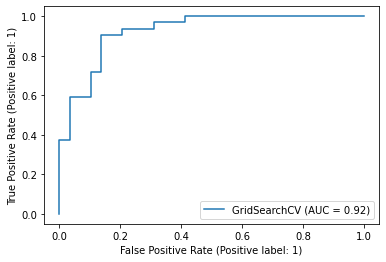

In [69]:
# plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(gs_log_res,X_test,y_test);

In [70]:
# confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


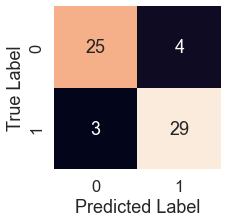

In [73]:
sns.set(font_scale= 1.5)
def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                      annot=True,
                    cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

plot_conf_mat(y_test,y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

In [74]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation metrics using cross-validation
We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score()

In [77]:
#  check best hyperparameters
gs_log_res.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [79]:
#  create a new classifier with best parmaeters
clf = LogisticRegression(C=0.23357214690901212,
                        solver="liblinear")

In [82]:
# cross-validated accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [83]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [84]:
# cross validates precison
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8215873015873015

In [85]:
# cross -validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [86]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

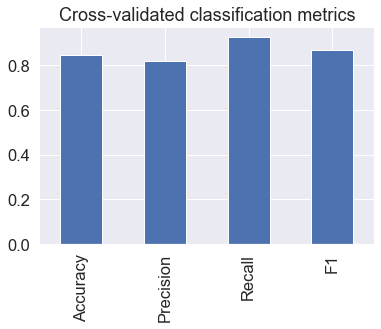

In [87]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

## Feature Importance
Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...

In [88]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [89]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [90]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

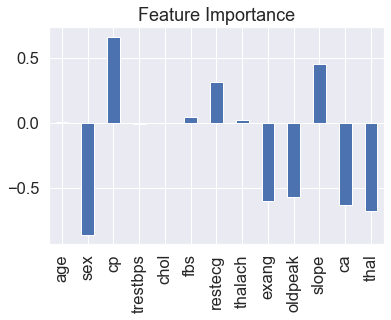

In [91]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [92]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [93]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak exercise ST segment

* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart

## 6. Experimentation
If you haven't hit your evaluation metric yet... ask yourself...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?